In [1]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Sampling and Collection
Three raw data sets have been used. The first and third are given by the staff, and the second one is found on the internet.
Read the raw data into pandas dataframe:


In [2]:
time_series_death_county = pd.read_csv("time_series_covid19_deaths_US.csv", index_col='UID')

In [3]:
demographic_county = pd.read_csv("county_complete.csv", index_col='fips')

In [4]:
time_series_confirmed_county = pd.read_csv("time_series_covid19_confirmed_US.csv", index_col='UID')


## Data Cleaning
The **time_series_death_county** and **time_series_confirmed_county** raw dataframes contain tons of daily culmulative covid cases, with granularity of US county level. In this project, I would like to explore **every county's monthly death number** since Feb/2020. So I cleaned and manipulated the data and eventually used "MM/1/YY" column to represent the number of confirmed cases/death in the past month. For example, 3/1/22_confirmed represents the number of confirmed cases in Feburary 2022.  

In [5]:
# drop first four columns
monthly_death_county = time_series_death_county.iloc[:,4:].drop(
    ['Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20', '1/24/20',
     '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20'], axis=1)

In [6]:
monthly_death_county_first_four = monthly_death_county.iloc[:,:4]

In [7]:
monthly_death_county_last = monthly_death_county.iloc[:,4:].filter(regex=("[0-9]+/1/[0-9]+"))

In [8]:
monthly_death_county_combined = monthly_death_county_first_four.merge(monthly_death_county_last, left_on='UID', right_on='UID')

In [9]:
monthly_death_county_individual = monthly_death_county_combined

In [10]:
i = monthly_death_county_individual.shape[1] - 1
while i > 4:
    monthly_death_county_individual.iloc[:,i] = monthly_death_county_combined.iloc[:,i] - monthly_death_county_combined.iloc[:,i-1]
    i = i - 1

monthly_death_county_individual['3/28/22'] = monthly_death_county['3/28/22'] - monthly_death_county['3/1/22']

In [11]:
monthly_confirmed_county = time_series_confirmed_county.iloc[:,4:].drop(
    ['Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20', '1/24/20',
     '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20'], axis=1)

In [12]:
monthly_confirmed_county_first_three = monthly_confirmed_county.iloc[:,:3]

In [13]:
monthly_confirmed_county_last = monthly_confirmed_county.iloc[:,3:].filter(regex=("[0-9]+/1/[0-9]+"))

In [14]:
monthly_confirmed_county_combined = monthly_confirmed_county_first_three.merge(monthly_confirmed_county_last, left_on='UID', right_on='UID')

In [15]:
i = monthly_confirmed_county_combined.shape[1] - 1
while i > 3:
    monthly_confirmed_county_combined.iloc[:,i] = monthly_confirmed_county_combined.iloc[:,i] - monthly_confirmed_county_combined.iloc[:,i-1]
    i = i - 1

monthly_confirmed_county_combined['3/28/22'] = monthly_confirmed_county['3/28/22'] - monthly_confirmed_county['3/1/22']

In [16]:
monthly_confirmed_county_combined['Mar/2022 death'] = monthly_death_county_combined['3/28/22']

Cleaning the **demographic_county** dataframe by only selecting some of the features that I am interested in. 

In [17]:
demographic_county_reduced = demographic_county[['state', 'name', 'uninsured_2019', 'pop_2019', 'age_over_65_2019', 'age_over_85_2019', 'bachelors_2019', 'median_age_2019', 'black_2019', 'asian_2019', 'hispanic_2019', 'per_capita_income_2019', 'area_2010', 'persons_per_household_2019', 'poverty_2017']]

In [18]:
demographic_county_reduced['pop_density'] = demographic_county_reduced['pop_2019']/demographic_county_reduced['area_2010']

In [19]:
March_death_county = monthly_death_county[['Admin2', 'Province_State']]
March_death_county['death'] = monthly_death_county['3/28/22'] - monthly_death_county['3/1/22']

In [20]:
demographic_county_reduced['name'] = demographic_county_reduced['name'].str.replace(' County','')

In [21]:
monthly_confirmed_county_combined

Admin2 Province_State Country_Region  2/1/20  3/1/20  4/1/20  \
UID                                                                          
84001001     Autauga        Alabama             US       0       0      10   
84001003     Baldwin        Alabama             US       0       0      26   
84001005     Barbour        Alabama             US       0       0       0   
84001007        Bibb        Alabama             US       0       0       3   
84001009      Blount        Alabama             US       0       0       7   
...              ...            ...            ...     ...     ...     ...   
84056039       Teton        Wyoming             US       0       0      26   
84056041       Uinta        Wyoming             US       0       0       0   
84090056  Unassigned        Wyoming             US       0       0       0   
84056043    Washakie        Wyoming             US       0       0       1   
84056045      Weston        Wyoming             US       0       0       0   

          5/1/20  6/1/20  7/1/20  8/1/20  ...  8/1/21  9/1/21  10/1/21  \
UID                                       ...                            
84001001      33     194     325     502  ...     306    1235      963   
84001003     154     119     440    2455  ...    3372    7871     3221   
84001005      42     135     160     274  ...     163     577      409   
84001007      38      37     103     192  ...     211     606      636   
84001009      34      25     155     599  ...     375    1269     1211   
...          ...     ...     ...     ...  ...     ...     ...      ...   
84056039      70       4      31     217  ...      96     563      483   
84056041       8       4     165      82  ...      94     586      550   
84090056       0       0       0       0  ...       0       0        0   
84056043       7      29       2      10  ...      19     106      347   
84056045       0       1       1       3  ...      23     108      121   

          11/1/21  12/1/21  1/1/22  2/1/22  3/1/22  3/28/22  Mar/2022 death  
UID                                                                          
84001001      497      269     491    3764     738       96              15  
84001003      934      698    1788   12970    2106      398              34  
84001005      106       99     160    1416     169      210               4  
84001007      135       67     185    1597     245       41               2  
84001009      566      331     517    2840     676      126              16  
...           ...      ...     ...     ...     ...      ...             ...  
84056039      275      173     559    3393     448      114               0  
84056041      293      212      99    1224     249        5               2  
84090056        0        0       0       0       0        0               0  
84056043      347      117      18     314     146       14               0  
84056045      211       72      61     217      77       36               0  

[3342 rows x 31 columns]

In [22]:
monthly_death_county_individual

Admin2 Province_State Country_Region  Population  2/1/20  \
UID                                                                      
84001001     Autauga        Alabama             US       55869       0   
84001003     Baldwin        Alabama             US      223234       0   
84001005     Barbour        Alabama             US       24686       0   
84001007        Bibb        Alabama             US       22394       0   
84001009      Blount        Alabama             US       57826       0   
...              ...            ...            ...         ...     ...   
84056039       Teton        Wyoming             US       23464       0   
84056041       Uinta        Wyoming             US       20226       0   
84090056  Unassigned        Wyoming             US           0       0   
84056043    Washakie        Wyoming             US        7805       0   
84056045      Weston        Wyoming             US        6927       0   

          3/1/20  4/1/20  5/1/20  6/1/20  7/1/20  ...  7/1/21  8/1/21  9/1/21  \
UID                                               ...                           
84001001       0       0       3       2       6  ...       2       1       4   
84001003       0       1       3       5       0  ...       4      14      56   
84001005       0       0       1       0       0  ...       1       1       4   
84001007       0       0       0       1       0  ...       0       1       8   
84001009       0       0       0       1       0  ...       0       0       6   
...          ...     ...     ...     ...     ...  ...     ...     ...     ...   
84056039       0       0       0       0       0  ...       2       0       0   
84056041       0       0       0       0       0  ...       0       1       1   
84090056       0       0       6      10       3  ...      -1       0       0   
84056043       0       0       0       0       0  ...       0       0       1   
84056045       0       0       0       0       0  ...       1       0       0   

          10/1/21  11/1/21  12/1/21  1/1/22  2/1/22  3/1/22  3/28/22  
UID                                                                   
84001001       24        6        9       3       7      28       15  
84001003      129       41       34       4      21      27       34  
84001005        6        5        4       1       3       9        4  
84001007       10        4        7       1       1       3        2  
84001009       16       17       15       5       9      12       16  
...           ...      ...      ...     ...     ...     ...      ...  
84056039        2        1        0       0       1       1        0  
84056041       10        1        5       0       4       2        2  
84090056        0        0        0       0       0       0        0  
84056043        0        8        1       1       4       2        0  
84056045        2        1        5       0       3       1        0  

[3342 rows x 31 columns]

In [23]:
demographic_county_reduced

state        name  uninsured_2019  pop_2019  age_over_65_2019  \
fips                                                                     
1001   Alabama     Autauga             7.1     55380              15.0   
1003   Alabama     Baldwin             8.9    212830              20.0   
1005   Alabama     Barbour            11.3     25361              18.6   
1007   Alabama        Bibb            10.7     22493              15.9   
1009   Alabama      Blount            10.8     57681              17.9   
...        ...         ...             ...       ...               ...   
56037  Wyoming  Sweetwater            11.3     43521              11.4   
56039  Wyoming       Teton            12.7     23280              14.0   
56041  Wyoming       Uinta            11.2     20479              13.0   
56043  Wyoming    Washakie            15.0      8027              21.1   
56045  Wyoming      Weston            11.8      7049              19.4   

       age_over_85_2019  bachelors_2019  median_age_2019  black_2019  \
fips                                                                   
1001                1.6            26.6             38.2        19.0   
1003                1.9            31.9             43.0         9.3   
1005                1.6            11.6             40.4        47.6   
1007                2.0            10.4             40.9        22.3   
1009                1.8            13.1             40.7         1.6   
...                 ...             ...              ...         ...   
56037               1.1            22.5             35.3         1.2   
56039               1.5            57.0             39.3         1.2   
56041               1.5            16.0             35.8         0.1   
56043               2.3            23.4             42.9         0.0   
56045               2.1            20.0             43.1         0.2   

       asian_2019  hispanic_2019  per_capita_income_2019  area_2010  \
fips                                                                  
1001          1.0            2.8                   29819     594.44   
1003          0.9            4.6                   32626    1589.78   
1005          0.5            4.4                   18473     884.88   
1007          0.1            2.6                   20778     622.58   
1009          0.4            9.3                   24747     644.78   
...           ...            ...                     ...        ...   
56037         0.8           15.9                   32603   10426.65   
56039         1.3           15.0                   54051    3995.38   
56041         0.2            9.1                   28159    2081.26   
56043         0.0           14.2                   28101    2238.55   
56045         0.8            1.1                   28531    2398.09   

       persons_per_household_2019  poverty_2017  pop_density  
fips                                                          
1001                         2.56          13.7    93.163313  
1003                         2.59          11.8   133.873869  
1005                         2.41          27.2    28.660383  
1007                         2.99          15.2    36.128690  
1009                         2.74          15.6    89.458420  
...                           ...           ...          ...  
56037                        2.77          12.0     4.174016  
56039                        2.47           6.8     5.826730  
56041                        2.66          14.9     9.839712  
56043                        2.34          12.8     3.585803  
56045                        2.32          14.4     2.939423  

[3142 rows x 16 columns]

### Merge the three dataframes into one dataframe called "merge2":

In [24]:
merge1 = monthly_confirmed_county_combined.merge(monthly_death_county_individual.iloc[:,4:30], how = 'inner', left_index=True, right_index=True, suffixes=['_confirmed', '_death'])

In [25]:
merge2 = merge1.merge(demographic_county_reduced, how='inner', left_on=['Province_State','Admin2'], right_on = ['state','name'])
merge2.columns

Index(['Admin2', 'Province_State', 'Country_Region', '2/1/20_confirmed',
       '3/1/20_confirmed', '4/1/20_confirmed', '5/1/20_confirmed',
       '6/1/20_confirmed', '7/1/20_confirmed', '8/1/20_confirmed',
       '9/1/20_confirmed', '10/1/20_confirmed', '11/1/20_confirmed',
       '12/1/20_confirmed', '1/1/21_confirmed', '2/1/21_confirmed',
       '3/1/21_confirmed', '4/1/21_confirmed', '5/1/21_confirmed',
       '6/1/21_confirmed', '7/1/21_confirmed', '8/1/21_confirmed',
       '9/1/21_confirmed', '10/1/21_confirmed', '11/1/21_confirmed',
       '12/1/21_confirmed', '1/1/22_confirmed', '2/1/22_confirmed',
       '3/1/22_confirmed', '3/28/22', 'Mar/2022 death', '2/1/20_death',
       '3/1/20_death', '4/1/20_death', '5/1/20_death', '6/1/20_death',
       '7/1/20_death', '8/1/20_death', '9/1/20_death', '10/1/20_death',
       '11/1/20_death', '12/1/20_death', '1/1/21_death', '2/1/21_death',
       '3/1/21_death', '4/1/21_death', '5/1/21_death', '6/1/21_death',
       '7/1/21_death', '8/

After some manipulation of the data, interestingly, in the raw data, there are quite many invalid values. For example, some death/confirmed cases number in a month are found to be smaller than 0, which does not make any sense. There are also a few NA values. In the following cell, I get rid of them all and also droped some irrelevant string value columns.

In [26]:
new_df = merge2.drop(columns = {'state','name', 'Admin2', 'Province_State', 'Country_Region'})
new_df = new_df[new_df >= 0].dropna(axis=0)
new_df

2/1/20_confirmed  3/1/20_confirmed  4/1/20_confirmed  5/1/20_confirmed  \
0                    0                 0                10              33.0   
1                    0                 0                26             154.0   
2                    0                 0                 0              42.0   
4                    0                 0                 7              34.0   
6                    0                 0                 1              67.0   
...                ...               ...               ...               ...   
3006                 0                 0                 2              16.0   
3007                 0                 0                26              70.0   
3008                 0                 0                 0               8.0   
3009                 0                 0                 1               7.0   
3010                 0                 0                 0               0.0   

      6/1/20_confirmed  7/1/20_confirmed  8/1/20_confirmed  9/1/20_confirmed  \
0                194.0             325.0             502.0             378.0   
1                119.0             440.0            2455.0            1369.0   
2                135.0             160.0             274.0             152.0   
4                 25.0             155.0             599.0             516.0   
6                346.0             188.0             154.0             111.0   
...                ...               ...               ...               ...   
3006              12.0              59.0             153.0              60.0   
3007               4.0              31.0             217.0              82.0   
3008               4.0             165.0              82.0              42.0   
3009              29.0               2.0              10.0              59.0   
3010               1.0               1.0               3.0               6.0   

      10/1/20_confirmed  11/1/20_confirmed  ...  bachelors_2019  \
0                 357.0              383.0  ...            26.6   
1                1418.0              993.0  ...            31.9   
2                 137.0              162.0  ...            11.6   
4                 308.0              484.0  ...            13.1   
6                  50.0              108.0  ...            16.1   
...                 ...                ...  ...             ...   
3006               40.0              243.0  ...            22.5   
3007              161.0              223.0  ...            57.0   
3008               55.0              132.0  ...            16.0   
3009                8.0               44.0  ...            23.4   
3010               28.0              125.0  ...            20.0   

      median_age_2019  black_2019  asian_2019  hispanic_2019  \
0                38.2        19.0         1.0            2.8   
1                43.0         9.3         0.9            4.6   
2                40.4        47.6         0.5            4.4   
4                40.7         1.6         0.4            9.3   
6                40.8        45.4         0.3            1.4   
...               ...         ...         ...            ...   
3006             35.3         1.2         0.8           15.9   
3007             39.3         1.2         1.3           15.0   
3008             35.8         0.1         0.2            9.1   
3009             42.9         0.0         0.0           14.2   
3010             43.1         0.2         0.8            1.1   

      per_capita_income_2019  area_2010  persons_per_household_2019  \
0                      29819     594.44                        2.56   
1                      32626    1589.78                        2.59   
2                      18473     884.88                        2.41   
4                      24747     644.78                        2.74   
6                      21038     776.83                        3.00   
...                      ...        ...                         ...   
3006         

The cleaned and manipulated dataframe is saved to the current working directory:

In [27]:
from pathlib import Path  
filepath = Path('working file.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
new_df.to_csv(filepath)  

### Train-test split of our dataframe

In [28]:
np.random.seed(1337)

def train_test_split(data):
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    train_arr = shuffled_indices[0:2000]
    test_arr = np.setdiff1d(shuffled_indices, train_arr)
    return data.iloc[train_arr], data.iloc[test_arr]
    
train, test = train_test_split(new_df)

Showcase the trend of one county:

In [29]:
baldwin_confirmed = monthly_confirmed_county_combined[monthly_confirmed_county_combined['Admin2'] == 'Baldwin']
baldwin_death = monthly_death_county_combined[monthly_death_county_combined['Admin2'] == 'Baldwin']

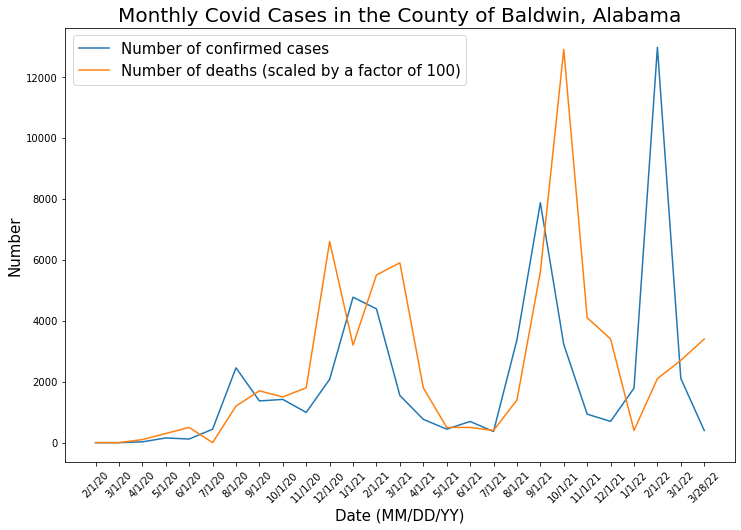

In [30]:
plt.figure(figsize=(12,8))
plt.plot(baldwin_confirmed.iloc[0,3:30], label="Number of confirmed cases")
plt.plot(baldwin_death.iloc[0,4:] * 100, label="Number of deaths (scaled by a factor of 100)")
plt.title("Monthly Covid Cases in the County of Baldwin, Alabama", fontsize=20)
plt.xlabel("Date (MM/DD/YY)", fontsize=15)
plt.ylabel("Number", fontsize=15)
plt.xticks(rotation = 45)
plt.legend(fontsize=15);

## Exploratory Data Analysis
### 1. Use seaborn heatmap to visualize the correlation between the monthly death numbers.

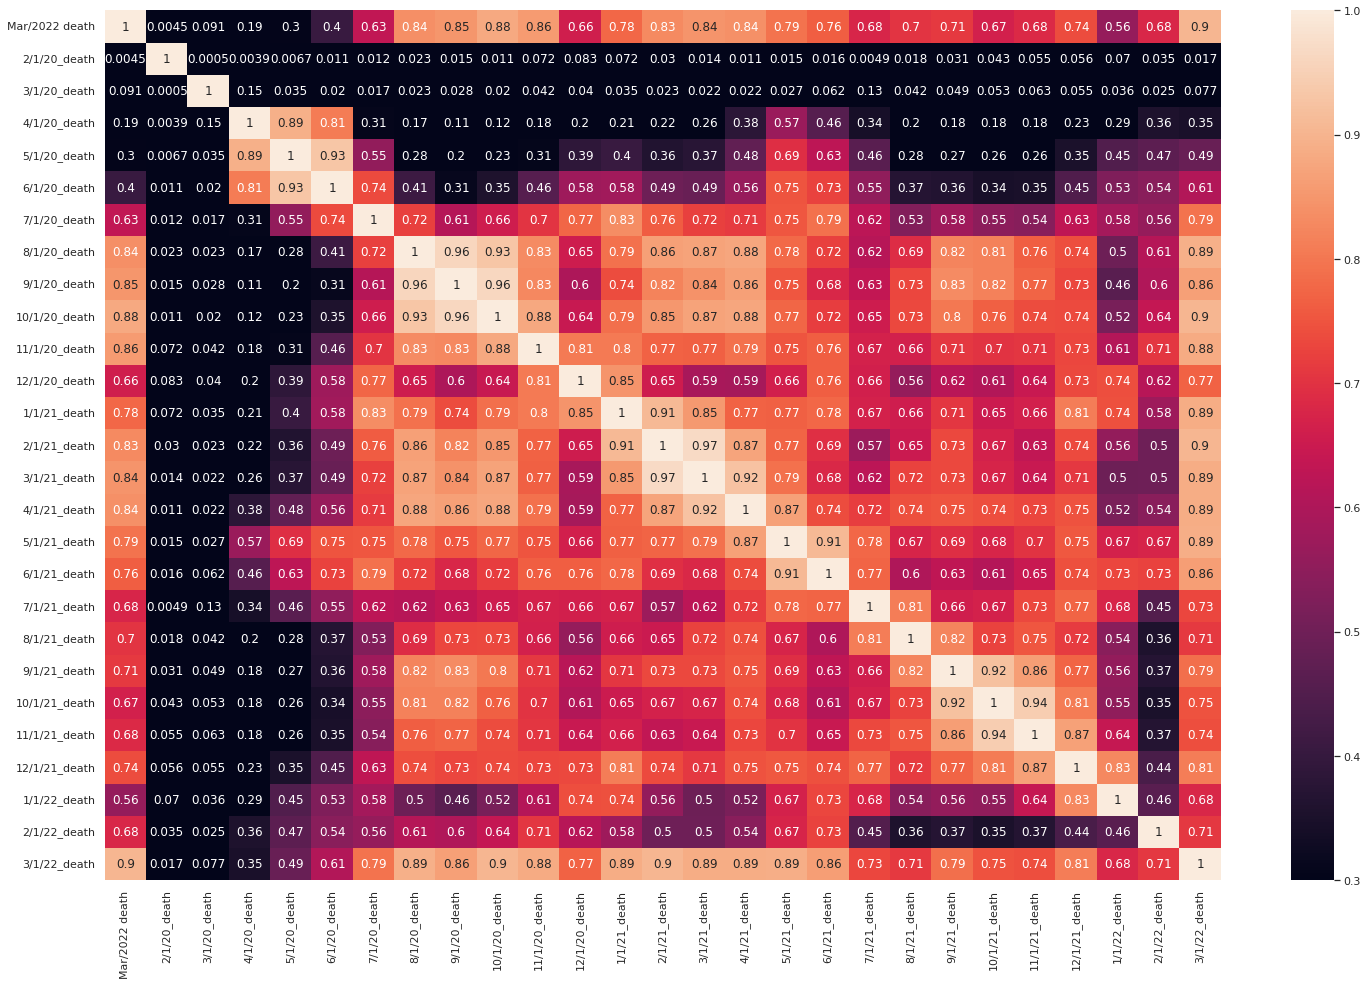

In [31]:
df = train.iloc[:,27:54]
sns.set(rc = {'figure.figsize':(25,16)})
g = sns.heatmap(df.corr().abs(), annot = True, vmin=0.3, vmax=1)

It seems that the monthly death numbers are highly correlated, except the first few months. I will get rid of them later.

Correlation of the target feature "Mar/2022 Death" with Confirmation Cases. It seems that the first few months are also not very correlated.

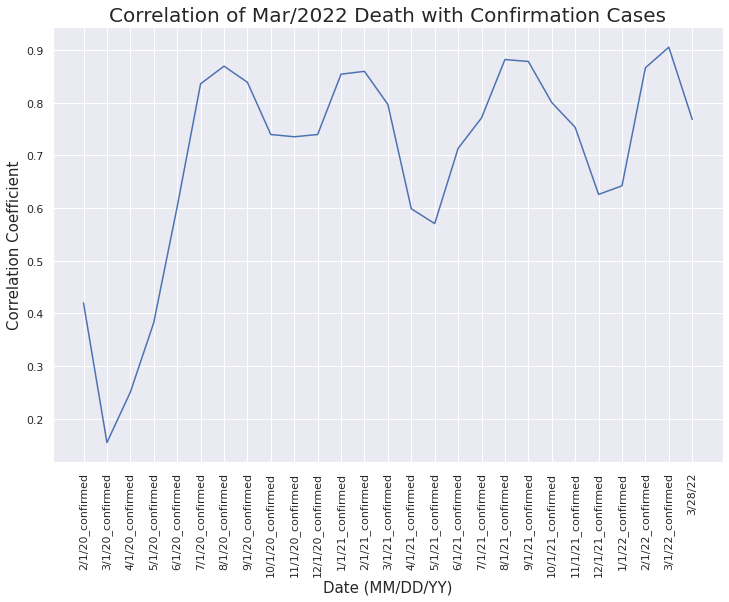

In [32]:
plt.figure(figsize=(12,8))
plt.plot(train.iloc[:,:27].corrwith(train['Mar/2022 death']))
plt.title("Correlation of Mar/2022 Death with Confirmation Cases", fontsize=20)
plt.xlabel("Date (MM/DD/YY)", fontsize=15)
plt.ylabel("Correlation Coefficient", fontsize=15)
plt.xticks(rotation = 90);

Correlation of the demographic features with the "Mar/2022 death" target column. It seems that only the "pop_2019" column, which represents the population of the county highly correlates to the death number. It is very well expected that the population will correlate with the death number, but it is a little surprise to me that all the other features that I previously though may influence the death number are actually irrelavent. 

<AxesSubplot:>

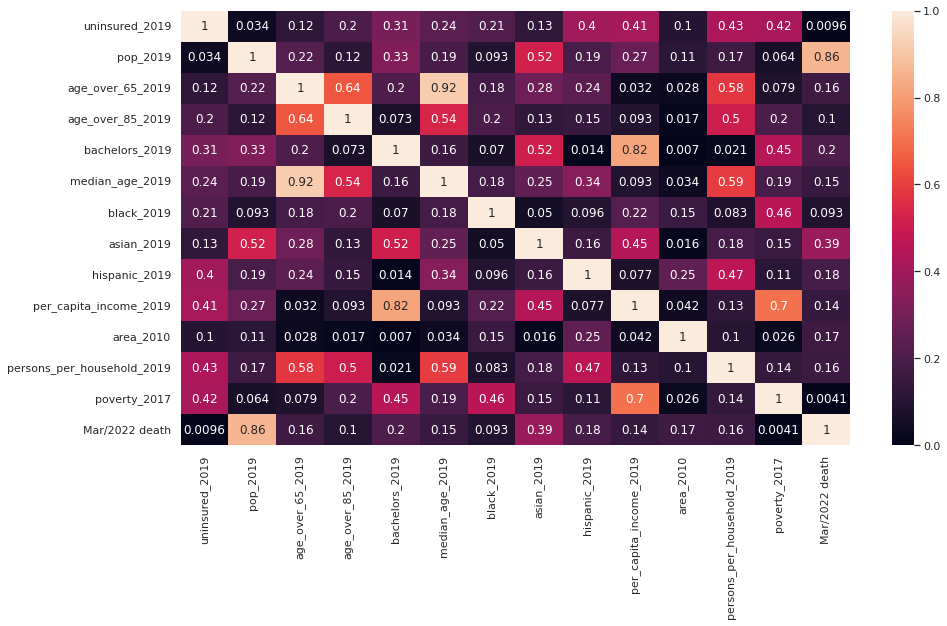

In [33]:
r = list(range(54,67)) + [27]
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(train.iloc[:,r].corr().abs(), annot = True, vmin=0, vmax=1)

Given the above exploratory data analysis, I picked all the features with greater than 0.8 correlation with the target column. However, those features themselves are also highly correlated, so I will likely be exposed to the overfitting issue, which I will try to resolve in the later sections.

In [34]:
ran = list(range(26,-1,-1)) + list(range(55,27,-1))

In [35]:
X_train_2 = train.iloc[:, ran].drop(columns = {'2/1/20_confirmed', '3/1/20_confirmed', '4/1/20_confirmed', '5/1/20_confirmed', 
                                               '2/1/20_death', '3/1/20_death', '4/1/20_death', '5/1/20_death', '6/1/20_death'})
Y_train = train['Mar/2022 death']

In [36]:
X_holdout_2 = test.iloc[:, ran].drop(columns = {'2/1/20_confirmed', '3/1/20_confirmed', '4/1/20_confirmed', '5/1/20_confirmed', 
                                               '2/1/20_death', '3/1/20_death', '4/1/20_death', '5/1/20_death', '6/1/20_death'})
Y_holdout = test['Mar/2022 death']

## Data Modeling and Inferences

Linear regression model was used to predict the death number of each county in March 2022, because according to previous analysis, that number is highly correlated to the selected features.

First, all the selected features are applied to construct the model, trying to get a sense of what the prediction looks like. 

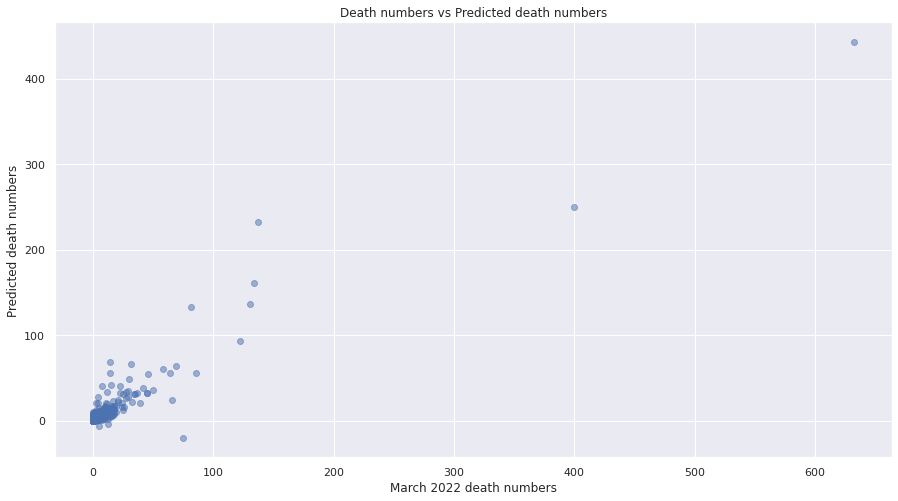

In [37]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
linear_model.fit(X_train_2, Y_train)

# Predict housing prices on the test set
Y_pred_2 = linear_model.predict(X_holdout_2)

# Plot predicted vs true death numbers
plt.scatter(Y_holdout, Y_pred_2, alpha=0.5)
plt.xlabel("March 2022 death numbers")
plt.ylabel("Predicted death numbers")
plt.title("Death numbers vs Predicted death numbers");

It is noticable that most death numbers are limited to the below 50 region. The following is to better look at the distribution of the data.

In [38]:
predict = pd.Series(Y_pred_2)
predict

0       1.399147
1      15.782674
2       3.630942
3       6.624730
4      12.221622
         ...    
381     7.691463
382     0.632400
383     1.427855
384     1.932861
385     1.446621
Length: 386, dtype: float64

In [39]:
Y_holdout = Y_holdout.to_numpy()
Y_holdout = pd.Series(Y_holdout)
Y_holdout

0       9.0
1      26.0
2       3.0
3      17.0
4      16.0
       ... 
381    18.0
382     1.0
383     0.0
384     2.0
385     0.0
Length: 386, dtype: float64

In [40]:

joint = pd.concat([Y_holdout, predict], axis=1)
joint

0          1
0     9.0   1.399147
1    26.0  15.782674
2     3.0   3.630942
3    17.0   6.624730
4    16.0  12.221622
..    ...        ...
381  18.0   7.691463
382   1.0   0.632400
383   0.0   1.427855
384   2.0   1.932861
385   0.0   1.446621

[386 rows x 2 columns]

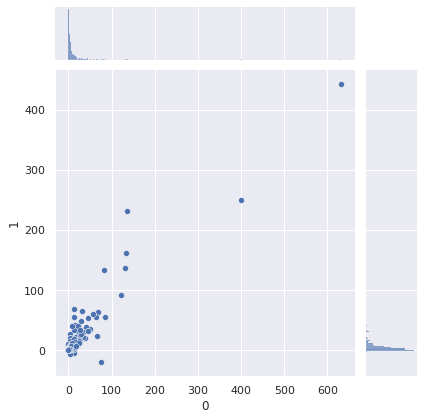

In [41]:
sns.jointplot(data=joint, x=0, y=1, kind="scatter")


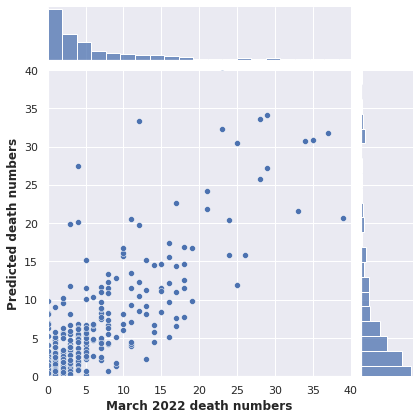

In [42]:
p = sns.jointplot(data=joint, x=0, y=1, kind="scatter", xlim = (0,40), ylim = (0,40))
p.ax_joint.set_xlabel('March 2022 death numbers', fontweight='bold')
p.ax_joint.set_ylabel('Predicted death numbers', fontweight='bold');

It seems that most numbers are below 20. Deleting some outliers may help with the modeling.

Function for calculating the root mean squared error (RMSE), which will be used to evalute the model:

In [43]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    return np.sqrt(1/len(actual_y) * sum((actual_y - predicted_y) ** 2))

train_error = rmse(Y_train, linear_model.predict(X_train_2))
holdout_error = rmse(Y_holdout, linear_model.predict(X_holdout_2))

print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)

Training RMSE: 7.622011168780648
Holdout RMSE: 16.044361953579422


The testing set RMSE is about 16. The following efforts will be focused on how to reduce this number.

The effects of using all the features are shown above, in the next section, only two features are selected for fitting the model.

In [44]:
X_train_1 = train[['3/1/22_death', '3/1/22_confirmed']]
X_holdout_1 = test[['3/1/22_death', '3/1/22_confirmed']]

In [45]:
linear_model.fit(X_train_1, Y_train)


LinearRegression()

In [46]:
train_error = rmse(Y_train, linear_model.predict(X_train_1))
holdout_error = rmse(Y_holdout, linear_model.predict(X_holdout_1))

print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)

Training RMSE: 11.710882344309828
Holdout RMSE: 14.221010548960022


The test set RMSE is a little bit lower, about 14. This shows that the selection of features does matter. Also, the below analysis shows that removing some outliers also helps reduce the RMSE.

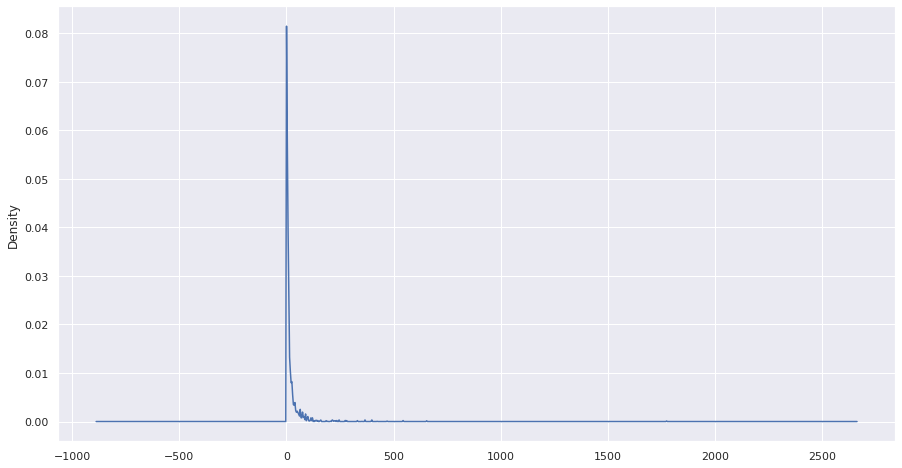

In [47]:
X_train_1['3/1/22_death'].plot.kde(bw_method=0.01);

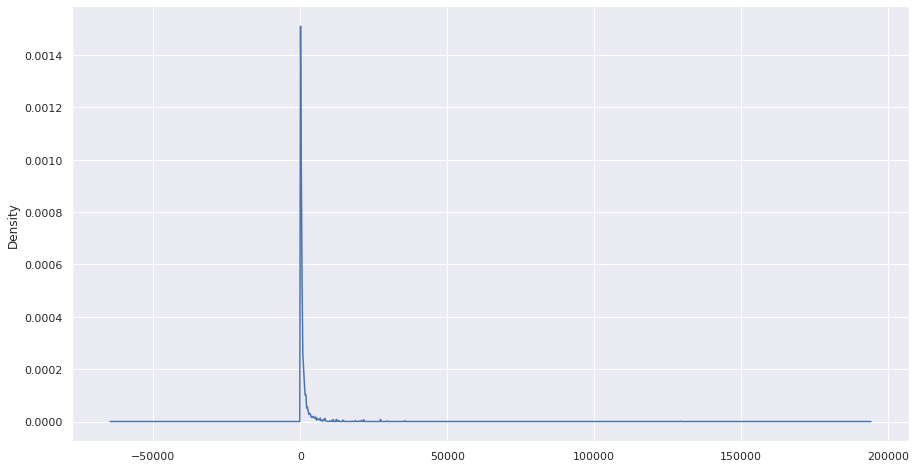

In [48]:
X_train_1['3/1/22_confirmed'].plot.kde(bw_method=0.01);

In [49]:
train_rm_outlier = train[['3/1/22_death', '3/1/22_confirmed', 'Mar/2022 death']]
train_rm_outlier = train_rm_outlier[train_rm_outlier['3/1/22_death'] < 130].dropna(axis=0)
train_rm_outlier = train_rm_outlier[train_rm_outlier['3/1/22_confirmed'] < 10000].dropna(axis=0)
X_train_3 = train_rm_outlier[['3/1/22_death', '3/1/22_confirmed']]
Y_train_3 = train_rm_outlier['Mar/2022 death']

linear_model.fit(X_train_3, Y_train_3)

train_error = rmse(Y_train_3, linear_model.predict(X_train_3))
holdout_error = rmse(Y_holdout, linear_model.predict(X_holdout_1))

print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)

Training RMSE: 7.870375890604476
Holdout RMSE: 13.678392649756873


The below section focuses on showing the RMSE of the model with different numbers of features.

In [50]:
errors_vs_N = pd.DataFrame(columns = ["N", "Training Error", "Holdout Error"])
range_of_num_features = range(1, X_train_2.shape[1] + 1)

for N in range_of_num_features:
    X_train_first_N_features = X_train_2.iloc[:, :N]    
    
    linear_model.fit(X_train_first_N_features, Y_train)
    train_error_overfit = rmse(Y_train, linear_model.predict(X_train_first_N_features))
    
    X_holdout_first_N_features = X_holdout_2.iloc[:, :N]
    holdout_error_overfit = rmse(Y_holdout, linear_model.predict(X_holdout_first_N_features))    
    errors_vs_N.loc[len(errors_vs_N)] = [N, train_error_overfit, holdout_error_overfit]
    
errors_vs_N

N  Training Error  Holdout Error
0    1.0       19.671587      27.460152
1    2.0       13.033988      18.259570
2    3.0       13.006479      18.331677
3    4.0       12.995153      18.632693
4    5.0       12.968077      18.055213
5    6.0       12.936611      18.039657
6    7.0       12.289789      17.237307
7    8.0       11.536533      14.718342
8    9.0       10.976525      13.732249
9   10.0       10.945942      13.466939
10  11.0       10.861174      14.399821
11  12.0       10.707152      15.833776
12  13.0       10.655399      16.150273
13  14.0       10.655201      16.193712
14  15.0       10.410303      14.815293
15  16.0       10.223746      18.220081
16  17.0       10.215229      18.143063
17  18.0        9.996979      18.850205
18  19.0        9.843470      17.728839
19  20.0        9.763462      19.011497
20  21.0        9.753896      20.244353
21  22.0        9.725173      21.642940
22  23.0        9.690612      21.948140
23  24.0        9.515224      21.653652
24  25.0        9.509656      21.606758
25  26.0        9.098857      18.615061
26  27.0        9.068399      18.944345
27  28.0        9.066795      18.974560
28  29.0        9.009671      19.330605
29  30.0        9.007621      18.996739
30  31.0        8.732179      17.360149
31  32.0        8.726661      17.342718
32  33.0        8.449973      13.883468
33  34.0        8.409948      12.949210
34  35.0        8.071076      13.358708
35  36.0        7.887101      15.367322
36  37.0        7.807852      15.106634
37  38.0        7.766241      15.244943
38  39.0        7.731277      15.243378
39  40.0        7.731066      15.208666
40  41.0        7.730058      15.148920
41  42.0        7.714380      14.621406
42  43.0        7.693907      15.914712
43  44.0        7.661353      15.570097
44  45.0        7.629698      15.930108
45  46.0        7.622011      16.044362

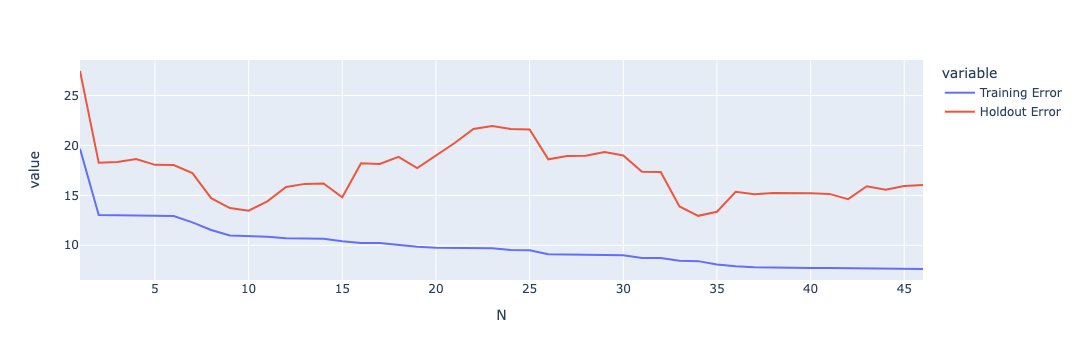

In [51]:
import plotly.express as px
px.line(errors_vs_N, x = "N", y = ["Training Error", "Holdout Error"])

The above graph demonstrates that selecting more features will always decrease the training error, but the holdout error may actually increase if we include more features. Also, from this graph, it is noticable that when some features are added, the holdout error will increase. I consider those features not useful, so I only selected the features that can help decrease the holdout error.

In [52]:
my_choice = list(range(0,10)) + [15] + [19] + list(range(25,35))
X_train_my_features = X_train_2.iloc[:, my_choice]    

linear_model.fit(X_train_my_features, Y_train)
train_error = rmse(Y_train, linear_model.predict(X_train_my_features))
    
X_holdout_my_features = X_holdout_2.iloc[:, my_choice]
holdout_error = rmse(Y_holdout, linear_model.predict(X_holdout_my_features))
print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)

Training RMSE: 8.588219943573417
Holdout RMSE: 11.461781283768994


Now the holdout RMSE is decreased to 11.46. The features I selected are listed below. The rationales behind selecting these features are written in the project writeup.  

In [53]:
X_train_my_features.columns

Index(['3/28/22', '3/1/22_confirmed', '2/1/22_confirmed', '1/1/22_confirmed',
       '12/1/21_confirmed', '11/1/21_confirmed', '10/1/21_confirmed',
       '9/1/21_confirmed', '8/1/21_confirmed', '7/1/21_confirmed',
       '1/1/21_confirmed', '9/1/20_confirmed', '3/1/22_death', '2/1/22_death',
       '1/1/22_death', '12/1/21_death', '11/1/21_death', '10/1/21_death',
       '9/1/21_death', '8/1/21_death', '7/1/21_death', '6/1/21_death'],
      dtype='object')

### Use ridge regression to further decrease the testing error:

In [54]:
new_df_ridge = new_df[['3/28/22', '3/1/22_confirmed', '2/1/22_confirmed', '1/1/22_confirmed',
       '12/1/21_confirmed', '11/1/21_confirmed', '10/1/21_confirmed',
       '9/1/21_confirmed', '8/1/21_confirmed', '7/1/21_confirmed',
       '1/1/21_confirmed', '9/1/20_confirmed', '3/1/22_death', '2/1/22_death',
       '1/1/22_death', '12/1/21_death', '11/1/21_death', '10/1/21_death',
       '9/1/21_death', '8/1/21_death', '7/1/21_death', '6/1/21_death']]
#new_df_ridge = new_df_ridge[['Mar/2022 death', '3/1/22_death', '2/1/22_confirmed']]

In [55]:
new_df_ridge['Mar/2022 death'] = new_df['Mar/2022 death']
new_df_ridge

3/28/22  3/1/22_confirmed  2/1/22_confirmed  1/1/22_confirmed  \
0        96.0             738.0              3764               491   
1       398.0            2106.0             12970              1788   
2       210.0             169.0              1416               160   
4       126.0             676.0              2840               517   
6        14.0             231.0              1193               171   
...       ...               ...               ...               ...   
3006     44.0             671.0              2012               197   
3007    114.0             448.0              3393               559   
3008      5.0             249.0              1224                99   
3009     14.0             146.0               314                18   
3010     36.0              77.0               217                61   

      12/1/21_confirmed  11/1/21_confirmed  10/1/21_confirmed  \
0                 269.0                497                963   
1                 698.0                934               3221   
2                  99.0                106                409   
4                 331.0                566               1211   
6                  89.0                145                377   
...                 ...                ...                ...   
3006              506.0                658               1309   
3007              173.0                275                483   
3008              212.0                293                550   
3009              117.0                347                347   
3010               72.0                211                121   

      9/1/21_confirmed  8/1/21_confirmed  7/1/21_confirmed  ...  2/1/22_death  \
0                 1235             306.0             107.0  ...           7.0   
1                 7871            3372.0             366.0  ...          21.0   
2                  577             163.0               9.0  ...           3.0   
4                 1269             375.0             100.0  ...           9.0   
6                  423             146.0              42.0  ...           6.0   
...                ...               ...               ...  ...           ...   
3006               652             218.0             237.0  ...          12.0   
3007               563              96.0              16.0  ...           1.0   
3008               586              94.0              48.0  ...           4.0   
3009               106              19.0               2.0  ...           4.0   
3010               108              23.0               3.0  ...           3.0   

      1/1/22_death  12/1/21_death  11/1/21_death  10/1/21_death  9/1/21_death  \
0              3.0            9.0            6.0           24.0           4.0   
1              4.0           34.0           41.0          129.0          56.0   
2              1.0            4.0            5.0            6.0           4.0   
4              5.0           15.0           17.0           16.0           6.0   
6              1.0            5.0            6.0           15.0           3.0   
...            ...            ...            ...            ...           ...   
3006           6.0           21.0           15.0           16.0           5.0   
3007           0.0            0.0            1.0            2.0           0.0   
3008           0.0            5.0            1.0           10.0           1.0   
3009           1.0            1.0            8.0            0.0           1.0   
3010           0.0            5.0            1.0            2.0           0.0   

      8/1/21_death  7/1/21_death  6/1/21_death  Mar/2022 death  
0              1.0           2.0           4.0            15.0  
1             14.0           4.0           5.0            34.0  
2              1.0           1.0           3.0             4.0  
4              0.0           0.0           4.0            16.0  
6              1.0           0.0           2.0             9.0  
...            ...           ...    

In [56]:

X = new_df_ridge.iloc[:,:22]
Y = new_df_ridge.iloc[:,22]
Y

0       15.0
1       34.0
2        4.0
4       16.0
6        9.0
        ... 
3006     1.0
3007     0.0
3008     2.0
3009     0.0
3010     0.0
Name: Mar/2022 death, Length: 2386, dtype: float64

Standardize the features:

In [57]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X_scaled = pd.DataFrame(ss.transform(X), columns = X.columns)
X_scaled

3/28/22  3/1/22_confirmed  2/1/22_confirmed  1/1/22_confirmed  \
0    -0.184498         -0.143380         -0.120195         -0.197507   
1     0.051419          0.183540          0.207236         -0.051855   
2    -0.095443         -0.279357         -0.203706         -0.234678   
3    -0.161062         -0.158196         -0.153059         -0.194587   
4    -0.248555         -0.264540         -0.211638         -0.233443   
...        ...               ...               ...               ...   
2381 -0.225119         -0.159391         -0.182508         -0.230523   
2382 -0.170437         -0.212683         -0.133390         -0.189871   
2383 -0.255585         -0.260239         -0.210535         -0.241528   
2384 -0.248555         -0.284853         -0.242901         -0.250624   
2385 -0.231369         -0.301343         -0.246351         -0.245796   

      12/1/21_confirmed  11/1/21_confirmed  10/1/21_confirmed  \
0             -0.267451          -0.185976          -0.150014   
1             -0.096170           0.025109           0.499331   
2             -0.335325          -0.374842          -0.309331   
3             -0.242697          -0.152647          -0.078695   
4             -0.339317          -0.356004          -0.318533   
...                 ...                ...                ...   
2381          -0.172827          -0.108208          -0.050513   
2382          -0.305780          -0.293210          -0.288050   
2383          -0.290209          -0.284515          -0.268783   
2384          -0.328138          -0.258431          -0.327160   
2385          -0.346104          -0.324124          -0.392152   

      9/1/21_confirmed  8/1/21_confirmed  7/1/21_confirmed  ...  3/1/22_death  \
0            -0.062727         -0.081292         -0.075349  ...      0.113093   
1             1.329766          1.415952          0.470391  ...      0.097039   
2            -0.200801         -0.151124         -0.281845  ...     -0.191919   
3            -0.055592         -0.047597         -0.090098  ...     -0.143759   
4            -0.233116         -0.159426         -0.212310  ...     -0.159813   
...                ...               ...               ...  ...           ...   
2381         -0.185063         -0.124266          0.198574  ...     -0.272185   
2382         -0.203738         -0.183843         -0.267095  ...     -0.320345   
2383         -0.198912         -0.184820         -0.199668  ...     -0.304292   
2384         -0.299635         -0.221445         -0.296594  ...     -0.304292   
2385         -0.299215         -0.219492         -0.294487  ...     -0.320345   

      2/1/22_death  1/1/22_death  12/1/21_death  11/1/21_death  10/1/21_death  \
0        -0.198598     -0.316162      -0.094168      -0.240339       0.162106   
1        -0.090313     -0.290775       0.806733       0.688990       2.488535   
2        -0.229536     -0.366935      -0.274348      -0.266892      -0.236710   
3        -0.183129     -0.265389       0.122048       0.051736      -0.015146   
4        -0.206333     -0.366935      -0.238312      -0.240339      -0.037302   
...            ...           ...            ...            ...            ...   
2381     -0.159925     -0.240002       0.338264      -0.001369      -0.015146   
2382     -0.245006     -0.392322      -0.418492      -0.373101      -0.325336   
2383     -0.221802     -0.392322      -0.238312      -0.373101      -0.148084   
2384     -0.221802     -0.366935      -0.382456      -0.187235      -0.369649   
2385     -0.229536     -0.392322      -0.238312      -0.373101      -0.325336   

      9/1/21_death  8/1/21_death  7/1/21_death  6/1/21_death  
0        -0.156999     -0.153538     -0.128050     -0.115509  
1         1.742106      1.104367      0.042588     -0.070905  
2        -0.156999     -0.153538     -0.213369     -0.160112  
3        -0.083956     -0.250299     -0.298687     -0.115509  
4        -0.193520     -0.153538     -0.298687     -0.204715  
...            ...           ...     

In [58]:
from sklearn.model_selection import train_test_split
X_train3, X_holdout3, Y_train3, Y_holdout3 = train_test_split(X_scaled, Y, test_size = 0.20)

In [59]:
X_holdout3

3/28/22  3/1/22_confirmed  2/1/22_confirmed  1/1/22_confirmed  \
1589 -0.232150         -0.274577         -0.196913         -0.165053   
608  -0.243086         -0.248290         -0.192005         -0.206716   
1958 -0.133721         -0.192609         -0.193997         -0.213229   
1278 -0.258710         -0.318788         -0.253856         -0.252197   
2314 -0.056384         -0.018395          0.013609          0.009460   
...        ...               ...               ...               ...   
2128 -0.254023         -0.292501         -0.242795         -0.244448   
681  -0.246211         -0.285092         -0.240483         -0.220079   
2159  0.601370         -0.264062         -0.215835         -0.174598   
1977 -0.169655         -0.264062         -0.207085         -0.225582   
895   0.465445          0.276262          0.748674          1.933815   

      12/1/21_confirmed  11/1/21_confirmed  10/1/21_confirmed  \
1589          -0.205566          -0.180663          -0.162667   
608           -0.275835          -0.362283          -0.320834   
1958          -0.314563          -0.309633          -0.167556   
1278          -0.363272          -0.422179          -0.421773   
2314           0.454005           0.403807           0.051001   
...                 ...                ...                ...   
2128          -0.334925          -0.338132          -0.379212   
681           -0.301388          -0.365665          -0.355055   
2159          -0.098965          -0.249737          -0.350166   
1977          -0.346903          -0.322192          -0.269358   
895            1.015758           1.119179           0.644557   

      9/1/21_confirmed  8/1/21_confirmed  7/1/21_confirmed  ...  3/1/22_death  \
1589         -0.256408         -0.212655         -0.267095  ...     -0.207972   
608          -0.227240         -0.181401         -0.246024  ...     -0.240079   
1958         -0.111829         -0.059805         -0.056385  ...     -0.047440   
1278         -0.321878         -0.230723         -0.300809  ...     -0.336399   
2314         -0.100288         -0.153566         -0.224953  ...     -0.240079   
...                ...               ...               ...  ...           ...   
2128         -0.304251         -0.219980         -0.273416  ...     -0.320345   
681          -0.289563         -0.202888         -0.292380  ...     -0.320345   
2159         -0.297327         -0.228770         -0.277631  ...     -0.304292   
1977         -0.226611         -0.182866         -0.258667  ...     -0.159813   
895           0.365345          0.153110          0.362928  ...      1.750525   

      2/1/22_death  1/1/22_death  12/1/21_death  11/1/21_death  10/1/21_death  \
1589     -0.144455     -0.087683      -0.202276      -0.240339      -0.214554   
608      -0.229536     -0.341548      -0.418492      -0.319996      -0.303180   
1958     -0.190863     -0.290775      -0.274348       0.104840       0.184263   
1278     -0.252740     -0.392322      -0.418492      -0.399653      -0.369649   
2314     -0.183129     -0.113069       0.049976      -0.187235      -0.281023   
...            ...           ...            ...            ...            ...   
2128     -0.245006     -0.392322      -0.310384      -0.346548      -0.281023   
681      -0.214067     -0.316162      -0.310384      -0.319996      -0.303180   
2159     -0.245006     -0.392322      -0.238312      -0.240339      -0.303180   
1977     -0.183129     -0.290775      -0.274348      -0.054473      -0.081615   
895       2.144997      1.460899       1.671597       1.459006       0.959739   

      9/1/21_death  8/1/21_death  7/1/21_death  6/1/21_death  
1589     -0.120477     -0.153538     -0.042731     -0.249318  
608      -0.193520     -0.250299     -0.213369     -0.249318  
1958      0.062129      0.233510     -0.128050     -0.204715  
1278     -0.303083     -0.250299     -0.298687     -0.293922  
2314     -0.120477     -0.250299     -0.213369     -0.249318  
...            ...           ...     

In [60]:
from sklearn.linear_model import Ridge
regularized_model = Ridge(alpha = 10**-3)
regularized_model.fit(X_train3, Y_train3)
regularized_model.coef_

array([-5.36265148,  7.22760622, -2.82795077, -8.39096923,  3.76705289,
       -1.60858632, -2.25587927, 11.82195374,  7.69452435,  1.57662091,
        1.87397041, -2.82817971, 17.38863749, -1.17611144, -0.39650462,
       -0.03101046,  5.60346419, -5.58469942, -5.03446001,  5.57780202,
        0.30982947,  4.35516485])

In [61]:
linear_model.fit(X_train3, Y_train3)
linear_model.coef_

array([-5.36265605,  7.2276451 , -2.82829833, -8.390895  ,  3.7671244 ,
       -1.60858261, -2.25598974, 11.82232067,  7.69448215,  1.57657686,
        1.87400436, -2.82823484, 17.38889875, -1.17627902, -0.39654391,
       -0.03101453,  5.60346522, -5.5847593 , -5.03451016,  5.57784902,
        0.30977637,  4.3551887 ])

In [62]:
train_error = rmse(Y_train3, linear_model.predict(X_train3))
holdout_error = rmse(Y_holdout3, linear_model.predict(X_holdout3))

print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)

Training RMSE: 8.456765667618555
Holdout RMSE: 10.675344652217015


In [63]:
error_vs_alpha = pd.DataFrame(columns = ["alpha", "Training Error", "Holdout Error"])
range_of_alphas = 10**np.linspace(-5, 4, 40)

for alpha in range_of_alphas:
    optimal_model = Ridge(alpha)
    optimal_model.fit(X_train3, Y_train3)
    training_error = rmse(Y_train3, optimal_model.predict(X_train3))
    holdout_error = rmse(Y_holdout3, optimal_model.predict(X_holdout3))
    error_vs_alpha.loc[len(error_vs_alpha)] = [alpha, training_error, holdout_error]


error_vs_alpha

alpha  Training Error  Holdout Error
0       0.000010        8.456766      10.675344
1       0.000017        8.456766      10.675344
2       0.000029        8.456766      10.675344
3       0.000049        8.456766      10.675343
4       0.000084        8.456766      10.675342
5       0.000143        8.456766      10.675340
6       0.000242        8.456766      10.675337
7       0.000412        8.456766      10.675332
8       0.000702        8.456766      10.675324
9       0.001194        8.456766      10.675309
10      0.002031        8.456766      10.675284
11      0.003455        8.456766      10.675242
12      0.005878        8.456766      10.675170
13      0.010000        8.456766      10.675048
14      0.017013        8.456766      10.674841
15      0.028943        8.456766      10.674488
16      0.049239        8.456766      10.673888
17      0.083768        8.456768      10.672870
18      0.142510        8.456773      10.671143
19      0.242446        8.456785      10.668224
20      0.412463        8.456822      10.663306
21      0.701704        8.456926      10.655080
22      1.193777        8.457215      10.641469
23      2.030918        8.457998      10.619346
24      3.455107        8.460043      10.584352
25      5.878016        8.465112      10.531186
26     10.000000        8.476851      10.454869
27     17.012543        8.501993      10.353512
28     28.942661        8.551628      10.232560
29     49.238826        8.642434      10.108978
30     83.767764        8.798371      10.012076
31    142.510267        9.052400       9.977895
32    242.446202        9.442034      10.035676
33    412.462638        9.989936      10.188819
34    701.703829       10.678305      10.403609
35   1193.776642       11.449310      10.621877
36   2030.917621       12.248830      10.794843
37   3455.107295       13.086024      10.918385
38   5878.016072       14.075836      11.059312
39  10000.000000       15.451121      11.381999

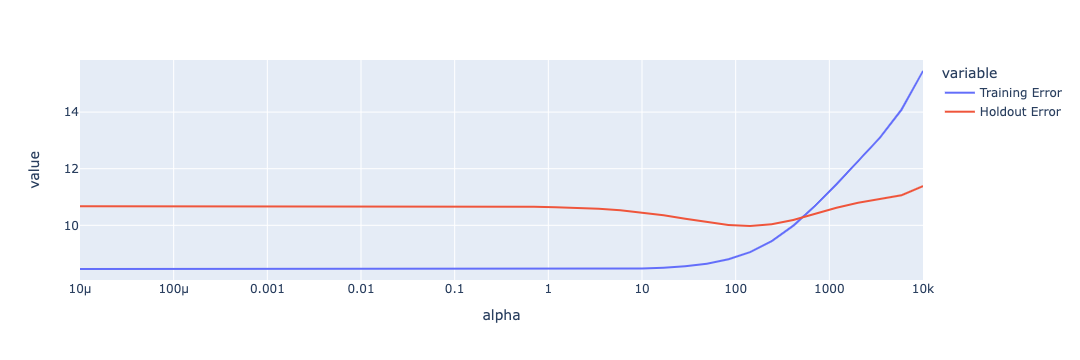

In [64]:
px.line(error_vs_alpha, x = "alpha", y = ["Training Error", "Holdout Error"], log_x=True)

### 5-fold cross-validation:

In [65]:
from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train):
    '''
    Split the training data into 5 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 5 splits.
    '''
    kf = KFold(n_splits=5)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx], Y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        error = rmse(split_Y_valid, model.predict(split_X_valid))


        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [66]:
cv_errors = []
range_of_alphas = 10**np.linspace(-5, 4, 40)

for alpha in range_of_alphas:
    cv_errors.append(compute_CV_error(Ridge(alpha), X_train3, Y_train3))

error_vs_alpha["CV Error"] = cv_errors

In [67]:
error_vs_alpha

alpha  Training Error  Holdout Error   CV Error
0       0.000010        8.456766      10.675344  10.367091
1       0.000017        8.456766      10.675344  10.367091
2       0.000029        8.456766      10.675344  10.367090
3       0.000049        8.456766      10.675343  10.367089
4       0.000084        8.456766      10.675342  10.367088
5       0.000143        8.456766      10.675340  10.367086
6       0.000242        8.456766      10.675337  10.367083
7       0.000412        8.456766      10.675332  10.367076
8       0.000702        8.456766      10.675324  10.367066
9       0.001194        8.456766      10.675309  10.367048
10      0.002031        8.456766      10.675284  10.367018
11      0.003455        8.456766      10.675242  10.366967
12      0.005878        8.456766      10.675170  10.366880
13      0.010000        8.456766      10.675048  10.366733
14      0.017013        8.456766      10.674841  10.366481
15      0.028943        8.456766      10.674488  10.366055
16      0.049239        8.456766      10.673888  10.365331
17      0.083768        8.456768      10.672870  10.364106
18      0.142510        8.456773      10.671143  10.362038
19      0.242446        8.456785      10.668224  10.358567
20      0.412463        8.456822      10.663306  10.352796
21      0.701704        8.456926      10.655080  10.343346
22      1.193777        8.457215      10.641469  10.328256
23      2.030918        8.457998      10.619346  10.305116
24      3.455107        8.460043      10.584352  10.271801
25      5.878016        8.465112      10.531186  10.228307
26     10.000000        8.476851      10.454869  10.179853
27     17.012543        8.501993      10.353512  10.140720
28     28.942661        8.551628      10.232560  10.137360
29     49.238826        8.642434      10.108978  10.208102
30     83.767764        8.798371      10.012076  10.395585
31    142.510267        9.052400       9.977895  10.730576
32    242.446202        9.442034      10.035676  11.213189
33    412.462638        9.989936      10.188819  11.803857
34    701.703829       10.678305      10.403609  12.437613
35   1193.776642       11.449310      10.621877  13.062029
36   2030.917621       12.248830      10.794843  13.676377
37   3455.107295       13.086024      10.918385  14.352582
38   5878.016072       14.075836      11.059312  15.242387
39  10000.000000       15.451121      11.381999  16.558749

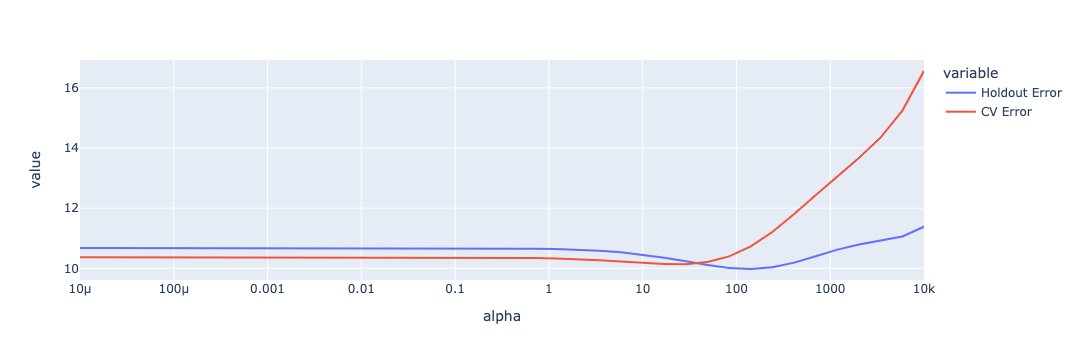

In [68]:
import plotly.express as px
px.line(error_vs_alpha, x = "alpha", y = ["Holdout Error", "CV Error"], log_x=True)

In [69]:
alpha_optimum = 100

In [70]:
X_train3.columns

Index(['3/28/22', '3/1/22_confirmed', '2/1/22_confirmed', '1/1/22_confirmed',
       '12/1/21_confirmed', '11/1/21_confirmed', '10/1/21_confirmed',
       '9/1/21_confirmed', '8/1/21_confirmed', '7/1/21_confirmed',
       '1/1/21_confirmed', '9/1/20_confirmed', '3/1/22_death', '2/1/22_death',
       '1/1/22_death', '12/1/21_death', '11/1/21_death', '10/1/21_death',
       '9/1/21_death', '8/1/21_death', '7/1/21_death', '6/1/21_death'],
      dtype='object')

In [71]:
X_train3

3/28/22  3/1/22_confirmed  2/1/22_confirmed  1/1/22_confirmed  \
201  -0.179030         -0.267408         -0.218573         -0.223448   
152   0.850567          1.820525          1.602285          0.313566   
2167  0.559186         -0.167994         -0.158038         -0.149331   
1     0.051419          0.183540          0.207236         -0.051855   
2088 -0.257929         -0.307795         -0.246991         -0.248715   
...        ...               ...               ...               ...   
731  -0.246992         -0.264301         -0.217755         -0.215026   
1222 -0.204809         -0.277684         -0.242119         -0.243213   
865  -0.044666         -0.164170         -0.213630         -0.218956   
265   5.140032         11.221840          9.482072         18.674899   
579  -0.220432         -0.233951         -0.165507         -0.136192   

      12/1/21_confirmed  11/1/21_confirmed  10/1/21_confirmed  \
201           -0.184406          -0.240076          -0.361669   
152            0.972638           1.818128           1.707147   
2167          -0.086189          -0.117386          -0.256129   
1             -0.096170           0.025109           0.499331   
2088          -0.368463          -0.401892          -0.402505   
...                 ...                ...                ...   
731           -0.273041          -0.289345          -0.321984   
1222          -0.296197          -0.322192          -0.372597   
865           -0.260664          -0.171002          -0.190850   
265            2.504983           4.572865          11.403612   
579            0.015222          -0.224136          -0.242901   

      9/1/21_confirmed  8/1/21_confirmed  7/1/21_confirmed  ...  3/1/22_death  \
201          -0.295438         -0.219003         -0.208096  ...     -0.272185   
152           1.988451          1.631798          1.955897  ...      0.867596   
2167         -0.233955         -0.210213         -0.286059  ...     -0.288239   
1             1.329766          1.415952          0.470391  ...      0.097039   
2088         -0.306979         -0.227305         -0.290273  ...     -0.320345   
...                ...               ...               ...  ...           ...   
731          -0.255149         -0.159426         -0.201775  ...     -0.240079   
1222         -0.303412         -0.221445         -0.292380  ...     -0.336399   
865          -0.222624         -0.210213         -0.298702  ...     -0.240079   
265          16.049351         19.762320         14.535296  ...     11.783812   
579          -0.049087         -0.145752         -0.227060  ...     -0.240079   

      2/1/22_death  1/1/22_death  12/1/21_death  11/1/21_death  10/1/21_death  \
201      -0.214067     -0.062296       0.049976      -0.346548      -0.347493   
152       0.389234      1.333966       1.815742       2.945934       1.978937   
2167     -0.183129     -0.290775      -0.310384      -0.213787      -0.325336   
1        -0.090313     -0.290775       0.806733       0.688990       2.488535   
2088     -0.229536     -0.392322      -0.418492      -0.373101      -0.347493   
...            ...           ...            ...            ...            ...   
731      -0.221802     -0.366935      -0.382456      -0.346548      -0.170241   
1222     -0.252740     -0.240002      -0.310384      -0.319996      -0.369649   
865      -0.167659     -0.316162      -0.310384      -0.346548      -0.214554   
265      23.670486     -0.392322      -0.418492      -0.399653      -0.369649   
579      -0.105782     -0.087683      -0.022096      -0.319996      -0.148084   

      9/1/21_death  8/1/21_death  7/1/21_death  6/1/21_death  
201      -0.303083     -0.250299     -0.128050     -0.249318  
152       2.582095      4.781319      1.919603      2.293068  
2167     -0.266562     -0.250299     -0.298687     -0.293922  
1         1.742106      1.104367      0.042588     -0.070905  
2088     -0.303083     -0.250299     -0.298687     -0.293922  
...            ...           ...     

In [72]:
optimal_model = Ridge(alpha_optimum)
optimal_model.fit(X_train3, Y_train3)
training_error = rmse(Y_train3, optimal_model.predict(X_train3))
holdout_error = rmse(Y_holdout3, optimal_model.predict(X_holdout3))
print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)

Training RMSE: 8.456765667618555
Holdout RMSE: 9.99195572688303


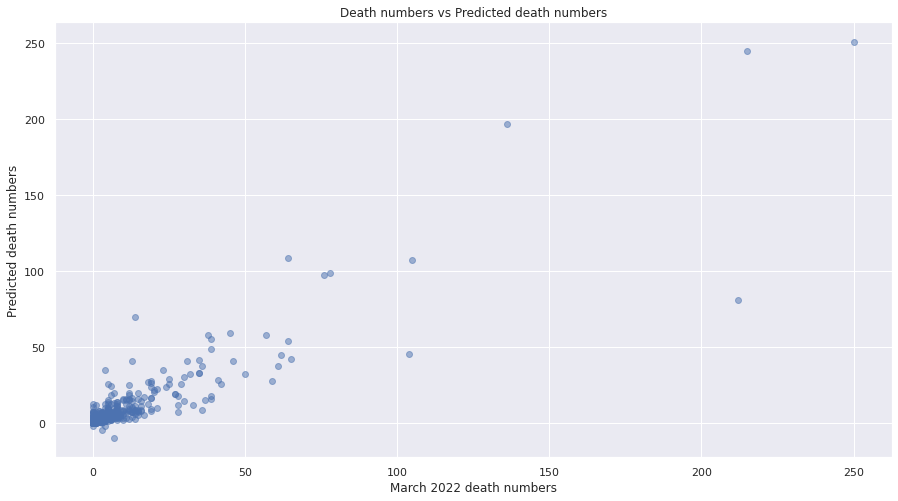

In [73]:
# Predict death numbers on the test set
Y_pred3 = optimal_model.predict(X_holdout3)

# Plot predicted vs true death numbers
plt.scatter(Y_holdout3, Y_pred3, alpha=0.5)
plt.xlabel("March 2022 death numbers")
plt.ylabel("Predicted death numbers")
plt.title("Death numbers vs Predicted death numbers");

Below is to calculate the R-squared value of the regression model.

In [76]:
r2_score = optimal_model.score(X_holdout3, Y_holdout3)
print(r2_score*100,'%')

80.60754785739461 %
